# MNIST Digit Classifier

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset.The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%. An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters.

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset=MNIST(root='data/', download=True) 

Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw


Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw


Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw


Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw
Processing...


..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Done!





In [3]:
len(dataset)

60000

In [4]:
test_dataset=MNIST(root='data/', train=False) 
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x1EDC148C448>, 5)

Thereby, 28x28 Image needs to be converted suitable tensor

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label:  5


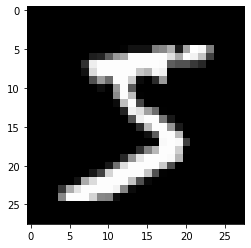

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label: ',label)

In [8]:
from torchvision.transforms import transforms

## Convert Dataset into tensor

In [9]:
dataset=MNIST(root='data/', train=True, transform=transforms.ToTensor()) 

In [10]:
img_tensor, label=dataset[0]
print(img_tensor.shape)
print(img_tensor[0, 10:20, 10:20])
print('Label', label)

torch.Size([1, 28, 28])
tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824, 0.6275, 0.4235, 0.0039, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412, 0.9922, 0.9922, 0.4667, 0.0980,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1765, 0.7294, 0.9922, 0.9922, 0.5882,
         0.1059],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0627, 0.3647, 0.9882, 0.9922,
         0.7333],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9765, 0.9922,
         0.9765],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1804, 0.5098, 0.7176, 0.9922, 0.9922,
         0.8118],
        [0.0000, 0.0000, 0.1529, 0.5804, 0.8980, 0.9922, 0.9922, 0.9922, 0.9804,
    

## To divide train dataset to training part and validation part

Validation dataset taken as 20% of Original dataset

In [11]:
import numpy as np
def split_indices(n, val_pct): 
    n_val=int(val_pct*n)
    idxs=np.random.permutation(n)
    return idxs[n_val:], idxs[:n_val]

In [12]:
train_indices, val_indices=split_indices(len(dataset), val_pct=0.2) 

In [13]:
print(len(train_indices), len(val_indices))

48000 12000


In [14]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

## Load random data into Validation and Test dataset

In [15]:
batch_size=100
train_sampler=SubsetRandomSampler(train_indices)
train_dataset=DataLoader(dataset, batch_size, sampler=train_sampler) 
val_sampler=SubsetRandomSampler(val_indices)
val_dataset=DataLoader(dataset, batch_size, sampler=val_sampler) 

In [16]:
import torch.nn as nn
model=nn.Linear(28*28,10) 

In [17]:
print(model.weight.shape)
print(model.bias.shape)
print(model.weight)
print(model.bias)

torch.Size([10, 784])
torch.Size([10])
Parameter containing:
tensor([[-0.0091, -0.0102,  0.0254,  ...,  0.0332, -0.0205, -0.0097],
        [-0.0113, -0.0121, -0.0169,  ...,  0.0211,  0.0160, -0.0179],
        [ 0.0195,  0.0125, -0.0081,  ...,  0.0006, -0.0342,  0.0219],
        ...,
        [-0.0298,  0.0355,  0.0225,  ...,  0.0176, -0.0278,  0.0292],
        [ 0.0044, -0.0197, -0.0184,  ..., -0.0315, -0.0294, -0.0338],
        [-0.0064, -0.0316,  0.0127,  ...,  0.0216, -0.0008,  0.0241]],
       requires_grad=True)
Parameter containing:
tensor([-0.0216,  0.0229, -0.0178, -0.0058, -0.0348,  0.0138, -0.0059, -0.0185,
         0.0132, -0.0237], requires_grad=True)


## Define a Neural Network to classify Digits into 10 different classes



In [18]:
class Mnist_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(28*28, 10) 
    
    def forward(self, xb):
        xb=xb.reshape(-1, 28*28)
        out=self.linear(xb)
        return out
    

In [19]:
model=Mnist_Model()

In [20]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0225,  0.0107, -0.0093,  ..., -0.0042, -0.0132,  0.0070],
         [-0.0012, -0.0271,  0.0025,  ..., -0.0196, -0.0053, -0.0261],
         [ 0.0107,  0.0082,  0.0252,  ..., -0.0171,  0.0136, -0.0248],
         ...,
         [ 0.0019, -0.0317,  0.0122,  ..., -0.0083, -0.0309, -0.0155],
         [-0.0305, -0.0351, -0.0287,  ..., -0.0337, -0.0065,  0.0128],
         [-0.0316, -0.0002, -0.0064,  ..., -0.0314,  0.0036, -0.0093]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0210, -0.0253, -0.0234,  0.0108,  0.0089,  0.0048,  0.0213,  0.0168,
         -0.0177,  0.0228], requires_grad=True)]

In [21]:
for im, lb in train_dataset:
    outputs=model(im)

print(outputs.shape)
print(outputs[:5].data)

torch.Size([100, 10])
tensor([[-0.0269, -0.0519, -0.3173,  0.1428, -0.0749,  0.0368, -0.1152,  0.3728,
          0.0209, -0.1736],
        [-0.0161, -0.0765, -0.4692,  0.1641,  0.2967,  0.1735,  0.1896,  0.0798,
          0.2305, -0.1609],
        [-0.4321,  0.3742, -0.1935,  0.0235,  0.2907, -0.2039,  0.1171,  0.4194,
         -0.1147, -0.1367],
        [-0.2163,  0.0171, -0.0429,  0.1536,  0.1464,  0.3649,  0.2535,  0.0365,
          0.0269, -0.1844],
        [-0.2009,  0.1894,  0.0241,  0.2980,  0.1637,  0.0192,  0.2249,  0.2456,
          0.1119, -0.2298]])


In [22]:
import torch.nn.functional as F


## Convert outputs from the model to probabilities signifying weights for each class

In [23]:
prob=F.softmax(outputs, dim=1) 
print('Probabilites : ', prob[:3].data)
print('Sum : ', torch.sum(prob[0]).item())

Probabilites :  tensor([[0.0976, 0.0952, 0.0730, 0.1156, 0.0930, 0.1040, 0.0893, 0.1455, 0.1024,
         0.0843],
        [0.0924, 0.0870, 0.0587, 0.1106, 0.1263, 0.1117, 0.1135, 0.1017, 0.1182,
         0.0799],
        [0.0617, 0.1383, 0.0784, 0.0974, 0.1272, 0.0776, 0.1069, 0.1447, 0.0848,
         0.0830]])
Sum :  1.0


## Find class for which the probability is maximum

In [24]:
max_prob, max_ind=torch.max(prob, dim=1) 
print(max_ind)

tensor([7, 4, 7, 5, 3, 3, 6, 6, 3, 3, 4, 6, 6, 3, 6, 5, 6, 5, 1, 3, 1, 7, 3, 1,
        3, 7, 7, 5, 5, 7, 7, 1, 7, 7, 1, 5, 6, 7, 1, 5, 1, 6, 3, 1, 3, 6, 4, 3,
        5, 5, 8, 8, 6, 6, 6, 5, 1, 3, 6, 5, 5, 1, 6, 5, 7, 3, 3, 7, 5, 1, 8, 7,
        6, 6, 7, 3, 3, 5, 7, 6, 6, 5, 1, 5, 6, 6, 6, 6, 3, 4, 7, 4, 8, 3, 7, 1,
        1, 3, 5, 1])


In [25]:
lb 

tensor([4, 7, 3, 9, 1, 0, 3, 0, 2, 2, 6, 0, 5, 3, 6, 9, 4, 8, 1, 2, 1, 8, 6, 1,
        4, 4, 9, 6, 5, 5, 4, 1, 5, 9, 7, 9, 7, 5, 3, 2, 3, 8, 0, 8, 2, 8, 4, 2,
        8, 9, 1, 1, 9, 5, 6, 7, 3, 2, 1, 5, 1, 9, 1, 9, 5, 7, 0, 5, 4, 9, 8, 7,
        1, 0, 4, 0, 2, 4, 8, 8, 6, 8, 9, 5, 6, 8, 6, 6, 3, 6, 5, 3, 5, 4, 5, 7,
        6, 2, 4, 5])

In [26]:
def accuracy(l1,l2): 
    return torch.sum(l1==l2).item()/len(l1)

In [27]:
accuracy(lb,max_ind)

0.18

## Loss function chosen is Softmax with SGD Optimizer

In [28]:
loss_fn=F.cross_entropy

In [29]:
loss=loss_fn(outputs, lb)

In [30]:
print(loss)

tensor(2.3021, grad_fn=<NllLossBackward>)


In [31]:
learning_rate=0.001
optim=torch.optim.SGD(model.parameters(), lr=learning_rate)

## Function to find loss for the batch

In [32]:
def loss_batch(model, loss_func, xb, yb, optim=None, metric=None):
    preds=model(xb)
    loss=loss_fn(preds, yb)
    if optim is not None:
        loss.backward()
        optim.step()
        optim.zero_grad()
    metric_result=None
    if metric is not None: 
        metric_result=metric(preds, yb)
    return loss.item(), len(xb), metric_result

## Function to find loss for the validation set

In [33]:
def evaluate(model, loss_fn, val_dataset, metric=None): 
    with torch.no_grad():
        results=[loss_batch(model, loss_fn, xb,yb,metric=metric) for xb, yb in val_dataset]
        losses, nums, metrics=zip(*results)
        total=np.sum(nums)
        avg_loss=np.sum(np.multiply(losses, nums))/total
        avg_metric=None
        if metric is not None:
            avg_metric=np.sum(np.multiply(metrics, nums))/total
        return avg_loss, total, avg_metric

## Function to find accuracy

In [34]:
def accuracy(outputs, labels):
    _, preds=torch.max(outputs, dim=1)
    return torch.sum(preds==labels).item()/len(labels)

In [35]:
val_loss, total, val_acc=evaluate(model, loss_fn, val_dataset, metric=accuracy) 
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3058, Accuracy: 0.1466


## Function to train the model and then evaluate on the Validation Set

In [36]:
def fit(epochs, model, loss_fn, optim, train_dl, val_dl, metric=None): 
    for epoch in range(epochs):
        for xb,yb in train_dl:
            loss,_,_=loss_batch(model, loss_fn, xb,yb, optim)
            
        result=evaluate(model, loss_fn, val_dl, metric)
        val_loss, total, val_metric=result
        
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'
                  .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

In [37]:
model=Mnist_Model()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

In [38]:
fit(1000, model, F.cross_entropy, optimizer, train_dataset, val_dataset, accuracy)

Epoch [1/1000], Loss: 1.8712, accuracy: 0.6943
Epoch [2/1000], Loss: 1.5726, accuracy: 0.7612
Epoch [3/1000], Loss: 1.3628, accuracy: 0.7830
Epoch [4/1000], Loss: 1.2122, accuracy: 0.7981
Epoch [5/1000], Loss: 1.1007, accuracy: 0.8088
Epoch [6/1000], Loss: 1.0154, accuracy: 0.8173
Epoch [7/1000], Loss: 0.9484, accuracy: 0.8237
Epoch [8/1000], Loss: 0.8945, accuracy: 0.8288
Epoch [9/1000], Loss: 0.8501, accuracy: 0.8326
Epoch [10/1000], Loss: 0.8129, accuracy: 0.8372
Epoch [11/1000], Loss: 0.7813, accuracy: 0.8403
Epoch [12/1000], Loss: 0.7540, accuracy: 0.8427
Epoch [13/1000], Loss: 0.7303, accuracy: 0.8448
Epoch [14/1000], Loss: 0.7094, accuracy: 0.8469
Epoch [15/1000], Loss: 0.6908, accuracy: 0.8488
Epoch [16/1000], Loss: 0.6742, accuracy: 0.8507
Epoch [17/1000], Loss: 0.6593, accuracy: 0.8530
Epoch [18/1000], Loss: 0.6457, accuracy: 0.8544
Epoch [19/1000], Loss: 0.6334, accuracy: 0.8558
Epoch [20/1000], Loss: 0.6221, accuracy: 0.8568
Epoch [21/1000], Loss: 0.6117, accuracy: 0.8582
E

Epoch [337/1000], Loss: 0.3375, accuracy: 0.9056
Epoch [338/1000], Loss: 0.3374, accuracy: 0.9056
Epoch [339/1000], Loss: 0.3373, accuracy: 0.9058
Epoch [340/1000], Loss: 0.3372, accuracy: 0.9059
Epoch [341/1000], Loss: 0.3370, accuracy: 0.9058
Epoch [342/1000], Loss: 0.3369, accuracy: 0.9058
Epoch [343/1000], Loss: 0.3368, accuracy: 0.9058
Epoch [344/1000], Loss: 0.3367, accuracy: 0.9060
Epoch [345/1000], Loss: 0.3366, accuracy: 0.9058
Epoch [346/1000], Loss: 0.3365, accuracy: 0.9059
Epoch [347/1000], Loss: 0.3363, accuracy: 0.9058
Epoch [348/1000], Loss: 0.3362, accuracy: 0.9060
Epoch [349/1000], Loss: 0.3361, accuracy: 0.9062
Epoch [350/1000], Loss: 0.3360, accuracy: 0.9062
Epoch [351/1000], Loss: 0.3359, accuracy: 0.9062
Epoch [352/1000], Loss: 0.3358, accuracy: 0.9062
Epoch [353/1000], Loss: 0.3357, accuracy: 0.9062
Epoch [354/1000], Loss: 0.3355, accuracy: 0.9064
Epoch [355/1000], Loss: 0.3354, accuracy: 0.9064
Epoch [356/1000], Loss: 0.3353, accuracy: 0.9064
Epoch [357/1000], Lo

Epoch [671/1000], Loss: 0.3143, accuracy: 0.9115
Epoch [672/1000], Loss: 0.3142, accuracy: 0.9115
Epoch [673/1000], Loss: 0.3142, accuracy: 0.9115
Epoch [674/1000], Loss: 0.3141, accuracy: 0.9115
Epoch [675/1000], Loss: 0.3141, accuracy: 0.9116
Epoch [676/1000], Loss: 0.3140, accuracy: 0.9117
Epoch [677/1000], Loss: 0.3140, accuracy: 0.9118
Epoch [678/1000], Loss: 0.3140, accuracy: 0.9118
Epoch [679/1000], Loss: 0.3139, accuracy: 0.9119
Epoch [680/1000], Loss: 0.3139, accuracy: 0.9119
Epoch [681/1000], Loss: 0.3138, accuracy: 0.9118
Epoch [682/1000], Loss: 0.3138, accuracy: 0.9119
Epoch [683/1000], Loss: 0.3138, accuracy: 0.9120
Epoch [684/1000], Loss: 0.3137, accuracy: 0.9120
Epoch [685/1000], Loss: 0.3137, accuracy: 0.9119
Epoch [686/1000], Loss: 0.3136, accuracy: 0.9120
Epoch [687/1000], Loss: 0.3136, accuracy: 0.9119
Epoch [688/1000], Loss: 0.3136, accuracy: 0.9119
Epoch [689/1000], Loss: 0.3135, accuracy: 0.9119
Epoch [690/1000], Loss: 0.3135, accuracy: 0.9119
Epoch [691/1000], Lo

KeyboardInterrupt: 

In [39]:
test_dataset=MNIST(root='data', train=False, transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


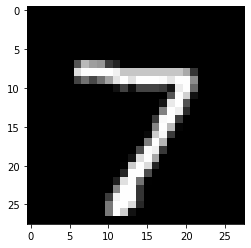

In [40]:
img, label=test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

## To create batch from single image

In [41]:
img.unsqueeze(0).shape 

torch.Size([1, 1, 28, 28])

## Predict image for test dataset

In [42]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

## Evaluation of model on Test Dataset

In [43]:
test_loader = DataLoader(test_dataset, batch_size=200)
test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 0.2866, Accuracy: 0.9199


In [44]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [45]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0147, -0.0165, -0.0281,  ..., -0.0011, -0.0135,  0.0079],
                      [ 0.0129, -0.0159, -0.0236,  ...,  0.0258,  0.0183, -0.0188],
                      [ 0.0168, -0.0178, -0.0118,  ..., -0.0014, -0.0181,  0.0002],
                      ...,
                      [-0.0317,  0.0196, -0.0253,  ...,  0.0189,  0.0002,  0.0031],
                      [-0.0112,  0.0338,  0.0056,  ...,  0.0310,  0.0250, -0.0136],
                      [ 0.0240, -0.0057,  0.0220,  ..., -0.0049,  0.0035, -0.0044]])),
             ('linear.bias',
              tensor([-0.2657,  0.3364,  0.0793, -0.2274,  0.0151,  1.0448, -0.0877,  0.4937,
                      -1.1849, -0.1946]))])

In [46]:
model2 = Mnist_Model()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0147, -0.0165, -0.0281,  ..., -0.0011, -0.0135,  0.0079],
                      [ 0.0129, -0.0159, -0.0236,  ...,  0.0258,  0.0183, -0.0188],
                      [ 0.0168, -0.0178, -0.0118,  ..., -0.0014, -0.0181,  0.0002],
                      ...,
                      [-0.0317,  0.0196, -0.0253,  ...,  0.0189,  0.0002,  0.0031],
                      [-0.0112,  0.0338,  0.0056,  ...,  0.0310,  0.0250, -0.0136],
                      [ 0.0240, -0.0057,  0.0220,  ..., -0.0049,  0.0035, -0.0044]])),
             ('linear.bias',
              tensor([-0.2657,  0.3364,  0.0793, -0.2274,  0.0151,  1.0448, -0.0877,  0.4937,
                      -1.1849, -0.1946]))])

In [47]:
test_loss, total, test_acc = evaluate(model2, loss_fn, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 0.2866, Accuracy: 0.9199
